In [1]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def create_df(path_to_txt, protocol):
    df_name = pd.DataFrame(columns=['metric', 'measure'])
    with open(path_to_txt, 'r') as fh:
        for line in fh.readlines():
            time_lookup = re.search('^(?P<metric>((.*?)*:)) (?P<measure>[0-9]*[,]?[0-9]+)', line)
            if time_lookup:
                metrics_dict = time_lookup.groupdict()
                df_name = df_name.append(metrics_dict, ignore_index=True)
    df_name['protocol'] = protocol
    df_name['measure'] = df_name['measure'].str.replace(',', '.').astype(float)
    df_name['metric'] = df_name['metric'].str.replace(':', '').astype(str)
    return df_name

In [37]:
def is_outlier(points, thresh=3.5):
    """
    Returns a boolean array with True if points are outliers and False 
    otherwise.

    Parameters:
    -----------
        points : An numobservations by numdimensions array of observations
        thresh : The modified z-score to use as a threshold. Observations with
            a modified z-score (based on the median absolute deviation) greater
            than this value will be classified as outliers.

    Returns:
    --------
        mask : A numobservations-length boolean array.

    References:
    ----------
        Boris Iglewicz and David Hoaglin (1993), "Volume 16: How to Detect and
        Handle Outliers", The ASQC Basic References in Quality Control:
        Statistical Techniques, Edward F. Mykytka, Ph.D., Editor. 
    """
    if len(points.shape) == 1:
        points = points[:,None]
    median = np.median(points, axis=0)
    diff = np.sum((points - median)**2, axis=-1)
    diff = np.sqrt(diff)
    med_abs_deviation = np.median(diff)

    modified_z_score = 0.6745 * diff / med_abs_deviation

    return modified_z_score > thresh

In [58]:
shaghai_http_pd = create_df('shaghai_if_config_test.txt', 'http')
shaghai_https_pd = create_df('shaghai_if_config_test_s.txt', 'https')
seoul_http_pd = create_df('seoul_if_config_test.txt', 'http')
seoul_https_pd = create_df('seoul_if_config_test_s.txt', 'https')

In [62]:
shaghai_http_pd['city'] = 'shanghai'
shaghai_https_pd['city'] = 'shanghai'
seoul_http_pd['city'] = 'seoul'
seoul_https_pd['city'] = 'seoul'

In [63]:
shaghai_http_pd = shaghai_http_pd[~is_outlier(shaghai_http_pd['measure'])]
shaghai_https_pd = shaghai_https_pd[~is_outlier(shaghai_https_pd['measure'])]
seoul_http_pd = seoul_http_pd[~is_outlier(seoul_http_pd['measure'])]
seoul_https_pd = seoul_https_pd[~is_outlier(seoul_https_pd['measure'])]

In [101]:
shaghai_pd = pd.concat([shaghai_http_pd, shaghai_https_pd])
http = pd.concat([shaghai_http_pd, seoul_http_pd])
https = pd.concat([shaghai_https_pd, seoul_https_pd])
seoul_pd = pd.concat([seoul_http_pd, seoul_https_pd])

In [92]:
def draw_histograms(df, col, n_rows, n_cols):
    variables = df['metric'].unique()
    unique_param = df[col].unique()
    fig=plt.figure(figsize=(10,10))
    for i, var_name in enumerate(variables):
        ax=fig.add_subplot(n_rows,n_cols,i+1)
        x = df[(df['metric'] == var_name) & (df[col] == unique_param[0])]['measure']
        y = df[(df['metric'] == var_name) & (df[col] == unique_param[1])]['measure']
        plt.hist(x, alpha=0.5, label=unique_param[0])
        plt.hist(y, alpha=0.5, label=unique_param[1])
        plt.legend(loc='upper right')
        ax.set_title(var_name+" Distribution")
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

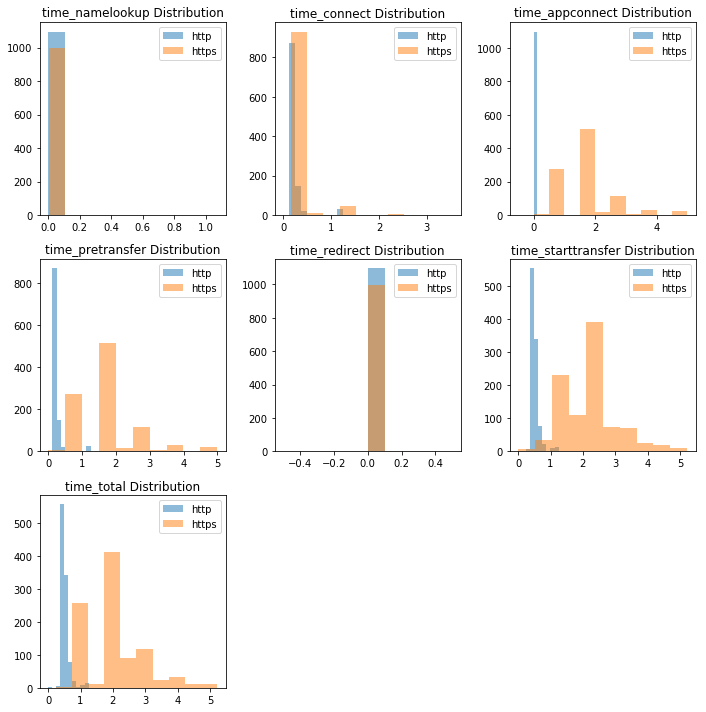

In [93]:
draw_histograms(shaghai_pd, 'protocol', 3, 3)

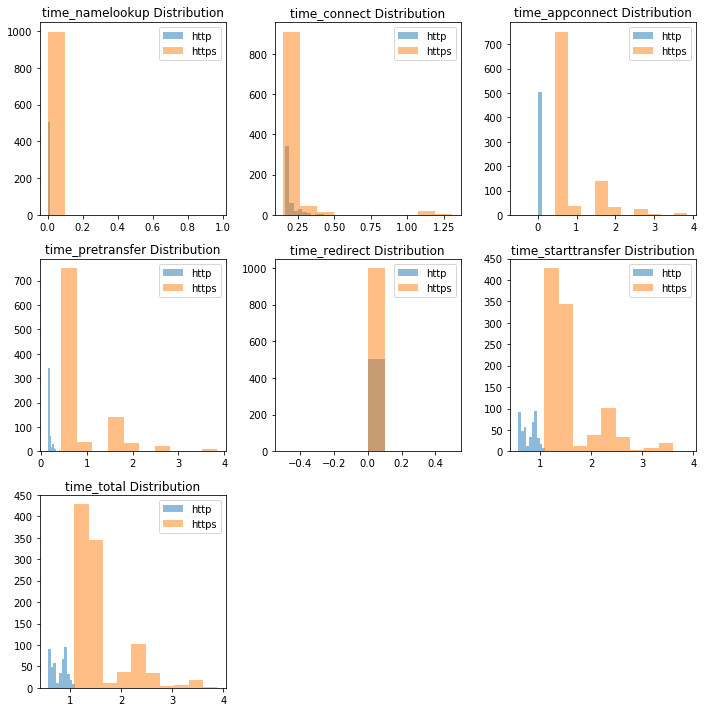

In [102]:
draw_histograms(seoul_pd, 'protocol', 3, 3)

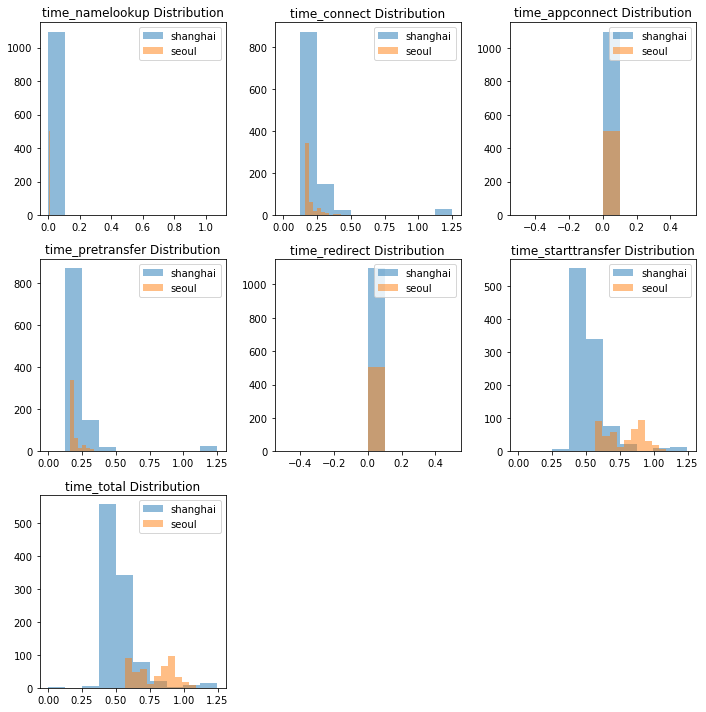

In [94]:
draw_histograms(http, 'city', 3, 3)

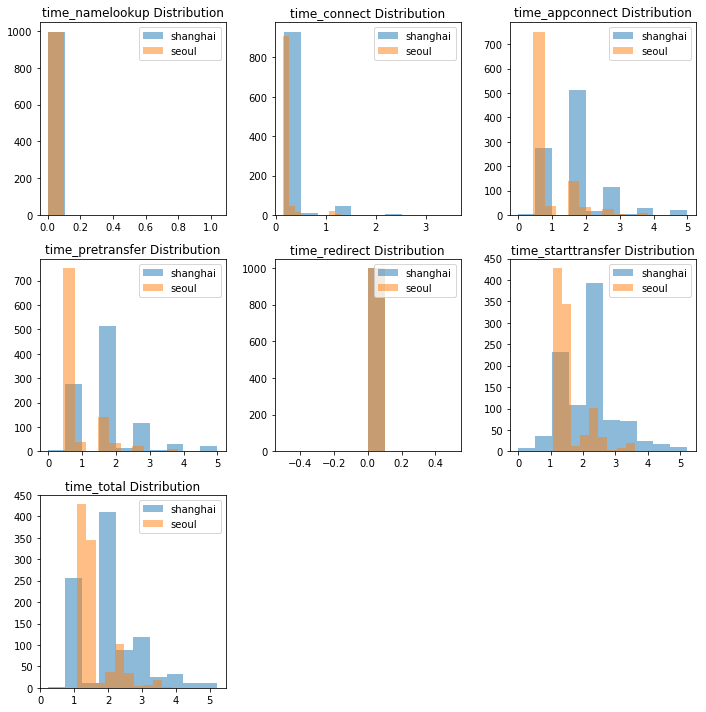

In [95]:
draw_histograms(https, 'city', 3, 3)

(array([    6.,  1063.,     4.,   685.,    16.,   140.,     7.,    38.,
            2.,    22.]),
 array([ 0.       ,  0.4995683,  0.9991366,  1.4987049,  1.9982732,
         2.4978415,  2.9974098,  3.4969781,  3.9965464,  4.4961147,
         4.995683 ]),
 <a list of 10 Patch objects>)

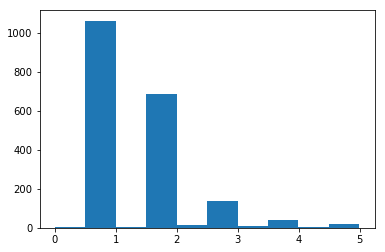

In [100]:
plt.hist(https[https['metric'] == 'time_pretransfer']['measure'])